In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url)
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


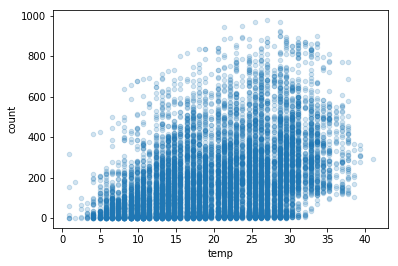

In [2]:
bikes.plot(kind='scatter', x='temp', y='count', alpha=0.2)

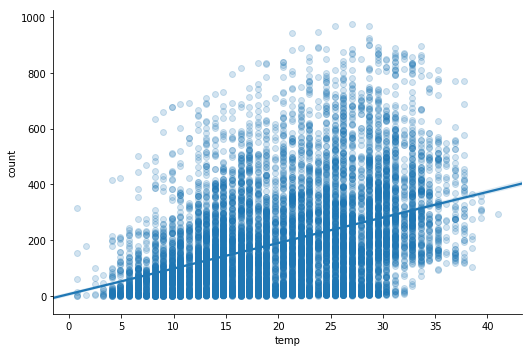

In [3]:
import seaborn as sns # seaborn을 사용하면 가장 잘 맞는 선을 얻을 수 있음
sns.lmplot(x='temp', y='count', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [4]:
bikes[['count', 'temp']].corr()

,count,temp
count,1.000000,0.394454
temp,0.394454,1.000000


두 값 사이에는 상관관계가 있다. 이제 선형 회귀 형태로 돌아가 보자.

In [5]:
# X와 y를 만든다.
feature_cols = ['temp'] # 예측 변수의 목록
X = bikes[feature_cols] # 예측 변수로 하위 집합을 지정
y = bikes['count'] # 응답 변수

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
limreg = LinearRegression()
limreg.fit(X,y)

# 계수 출력
print(limreg.intercept_)
print(limreg.coef_)

6.046212959616611
[9.17054048]


/anaconda3/envs/new_env/lib/python3.6/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


limreg.intercept_ 가 말하는 부분은 베타 a x=0인 경우 y 값이다.
기온이 0도 일때 대여될 자전거의 추정치다. 따라서 0도에는 6대의 자전거가 사용 중일 것으로 에측된다.

B(9.17)은 온도 계수
- y의 변화를 x1의 변화로 나눈 값
- x와 y가 함께 움직이는 정도를 나타냄
- 섭시 1도의 변화는 약 9대의 자전거 대여가 증가하는 것과 관련이 있다.
- 이 계수의 부호는 중요하다. 부호가 음수이면 온소의 상승이 자전거 대여의 하락과 관련 있음을 의미.

In [8]:
bikes['temp'] = 20
abc = bikes['temp']
abc = pd.DataFrame(abc)

limreg.predict(abc)[:1]

array([189.45702259])

In [9]:
abc.shape

(10886, 1)

predict는 2차원 배열로 넣어줘야 한다!!!!! 컬럼에 뭐가 담겨져 있는지도 포함

In [10]:
feature_cols = ['temp', 'season', 'weather', 'humidity']
X = bikes[feature_cols]
y = bikes['count']

linreg = LinearRegression()
linreg.fit(X, y)

azi =  zip(feature_cols, linreg.coef_)

for a in azi:
    print(a)

('temp', 0.0)
('season', 37.93779492993258)
('weather', 5.57938607801894)
('humidity', -3.4813217761831283)


- 모든 예측 변수를 일정하게 유지하고, 온도의 1단위 증가는 자전거 대여 7.86대 증가와 관련이 있다.
- 다른 모든 예측 변수를 일정하게 유지하고, 계절의 1단위 증가는 자전거 대여 22.5대 증가와 관련이 있다.
- 날씨의 1단위 증가는 자전거 대여 6.67대 증가와 관련이 있다.
- 습도의 1단위 증가는 자전거 대여 3.12대 감소와 관련이 있다.

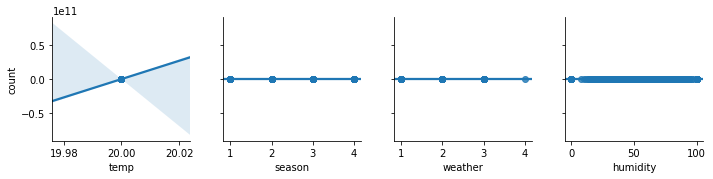

In [11]:
feature_cols=['temp', 'season', 'weather', 'humidity']

sns.pairplot(bikes, x_vars=feature_cols, y_vars='count', kind='reg')

날씨 부분이 저번에는 분명 + 였으나, 지금은 아래를 향하고 있다. 예측 변수의 잡음인지를 걱정해야 함.

## 회귀 측정 지표

In [12]:
# 참과 에측된 응답 값의 예
true=[9,6,7,6]
pred=[8,7,7,12]
# 지난 표현의 각 값은 모델에 대한 단일 예측을 나타내는 점에 유의하자.
# 따라서 네 가지 예측을 네 가지 실제 응답과 비교한다.

from sklearn import metrics
import numpy as np


In [13]:
print(f"MAE: {metrics.mean_absolute_error(true, pred)}")
print(f"MSE: {metrics.mean_squared_error(true, pred)}")
print(f"RMSE:{np.sqrt(metrics.mean_squared_error(true, pred))}")

MAE: 2.0
MSE: 9.5
RMSE:3.082207001484488


In [14]:
from sklearn import metrics

feature_cols = ['temp']
X = bikes[feature_cols]
linreg = LinearRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred)) # RMSE

181.1361335742659

In [15]:
feature_cols = ['temp','humidity']
X = bikes[feature_cols]
linreg = LinearRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred)) # RMSE

171.7716298771239

In [16]:
feature_cols = ['temp','humidity','season', 'holiday','workingday','windspeed', 'atemp']
X = bikes[feature_cols]
linreg = LinearRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred)) # RMSE

155.779953097804